Nama     : Muhammad Arsyad Ramadhan
Email    : arsyad351@gmail.com
domisili : Indonesia, Kalimantan timur, Kota Samarinda, Samarinda Ilir, Jl.Lumba-lumba, Kel.Selili, Gang.01, No.14

In [111]:
# Library
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os
import numpy as np 
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from keras.layers import Dropout
%matplotlib inline

In [110]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
-O /tmp/rockpaperscissors.zip

--2021-05-09 07:36:27--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z   2%[                    ]   6.30M  1.08MB/s    eta 4m 40s ^C


In [8]:
# ekstrak zip
local_zip = "/tmp/rockpaperscissors.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [112]:
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

validation_rock_dir = os.path.join(train_dir, 'rock')
validation_paper_dir = os.path.join(train_dir, 'paper')
validation_scissors_dir = os.path.join(train_dir, 'scissors')

In [113]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4)

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4)

In [120]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(300, 200),
        batch_size=4,
        class_mode='categorical',
        color_mode='rgb',
        subset='training')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 200),
        batch_size=4,
        class_mode='categorical',
        color_mode='rgb',
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [121]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(300, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [122]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [124]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/25
25/25 - 19s - loss: 0.2160 - accuracy: 0.9100 - val_loss: 0.2433 - val_accuracy: 0.8500
Epoch 2/25
25/25 - 19s - loss: 0.2246 - accuracy: 0.9100 - val_loss: 0.2732 - val_accuracy: 0.9000
Epoch 3/25
25/25 - 19s - loss: 0.2882 - accuracy: 0.9100 - val_loss: 0.2303 - val_accuracy: 0.9000
Epoch 4/25
25/25 - 19s - loss: 0.2285 - accuracy: 0.9200 - val_loss: 0.2563 - val_accuracy: 0.8500
Epoch 5/25
25/25 - 19s - loss: 0.2450 - accuracy: 0.9082 - val_loss: 0.2892 - val_accuracy: 0.9000
Epoch 6/25
25/25 - 19s - loss: 0.3822 - accuracy: 0.8400 - val_loss: 0.3278 - val_accuracy: 0.9000
Epoch 7/25
25/25 - 19s - loss: 0.1386 - accuracy: 0.9600 - val_loss: 0.1250 - val_accuracy: 0.9000
Epoch 8/25
25/25 - 19s - loss: 0.1920 - accuracy: 0.9400 - val_loss: 0.0462 - val_accuracy: 1.0000
Epoch 9/25
25/25 - 19s - loss: 0.3455 - accuracy: 0.9000 - val_loss: 0.2473 - val_accuracy: 0.9500
Epoch 10/25
25/25 - 19s - loss: 0.2585 - accuracy: 0.9000 - val_loss: 0.3047 - val_accuracy: 0.8000
Epoch 11/

Saving 0RA9rcrv8iVvuDDU.png to 0RA9rcrv8iVvuDDU.png
0RA9rcrv8iVvuDDU.png
paper


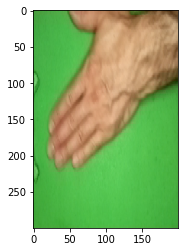

In [125]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  
  path = fn
  img = image.load_img(path, target_size=(300,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  prediksi = np.argmax(classes)
  
  if prediksi==0:
    print('paper')
  elif prediksi==1:
    print('rock')
  elif prediksi==2:
    print('scissors')
  else:
    print("tidak diketahui")